# Exercise 11: Clustering

## 1- Clustering vs. Classification
 
Imagine you already have a set of labeled emails (some marked as spam, and others marked as not spam).  
What Classification Does: The algorithm is trained on these labeled emails, learning the characteristics that make an email spam or not spam (such as certain words, the sender's email address, etc.).  

Training: The algorithm learns from emails like:

*Email 1: "Claim your free prize now!" → Label: Spam*

*Email 2: "Meeting at 3 PM" → Label: Not Spam*  

*Email 3: "You won a lottery!" → Label: Spam*

Now, Imagine you have a collection of emails, but you don't know which are spam and which are not spam.  
What **Clustering** Does: It will group the emails into clusters based on similarities, like emails that contain similar words (e.g., "free," "win," etc.). It could find two groups:

*Group 1: Emails with words like "free," "win," etc. (likely spam).*

*Group 2: Emails from friends, family, or work (likely not spam).*

**Outcome:** The algorithm doesn’t know which group is spam and which is not. It just finds groups of similar emails. You would need to interpret the groups manually. 

**Clustering** is an **unsupervised learning** technique because the algorithm doesn't use labeled data. It simply identifies patterns and groups without knowing the outcome in advance.

No Labels in Training: You didn't tell the algorithm what "spam" or "not spam" is in advance.*


Based on the following figure, classification, a supervised learning method, assigns data to predefined categories based on labeled examples, 
as shown on the left side of the image with distinct groups separated by dashed lines. In contrast, clustering is an unsupervised learning approach 
that groups similar data points without predefined labels, as seen on the right side, where blue dots form natural clusters. 
Classification relies on labeled data for prediction, while clustering identifies patterns and structures within the data.

<div style="text-align: center;">
<img src="img/ClsvsClu.png" width="800"/>



## 2- Clustering Methods
## K-Means Clustering

K-Means clustering is a simple and efficient method for partitioning data into K clusters, where each cluster is represented by its centroid. The algorithm iteratively assigns points to the nearest centroid and updates the centroids based on the average position of points in each cluster. While K-Means is fast and works well for spherical clusters, it requires specifying the number of clusters in advance and is sensitive to outliers

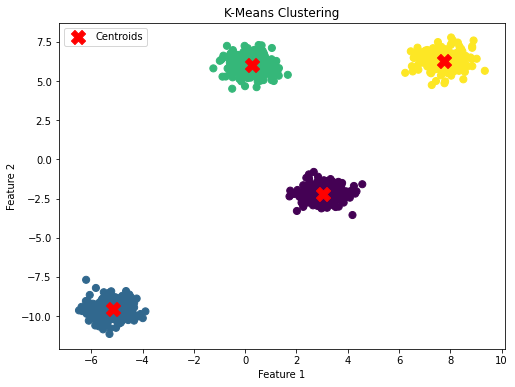

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.5)

# Apply K-Means
kmeans = KMeans(n_clusters=4, n_init=10)
# centers=4: Specifies that the data should have 4 distinct clusters.
# cluster_std=1: Specifies the standard deviation of the clusters' spread. A value of 1 means the clusters will be relatively tight.

# Fit the K-Means model to the data and predict the labels for each point
labels = kmeans.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Hierarchical Clustering

Hierarchical clustering constructs a tree-like structure, or dendrogram, that represents the hierarchy of clusters. It can be performed using an agglomerative approach, which starts with individual points and merges them into clusters, or a divisive approach, which begins with a single cluster and splits it recursively. Hierarchical clustering is advantageous because it does not require specifying the number of clusters beforehand and provides a clear hierarchy. However, it is computationally expensive for large datasets.

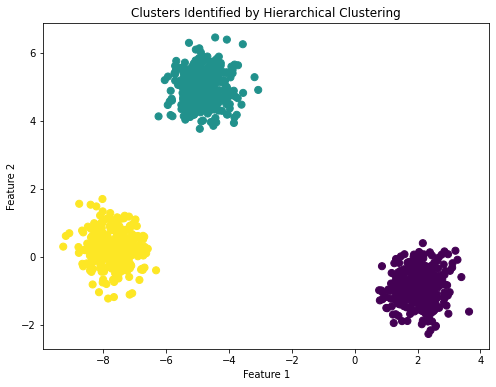

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.5)

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward') #ward  #single  #complete  #average  #centroid  #median
# The linkage function performs the hierarchical clustering. It calculates distances between data points and merges them into clusters.
# method='ward: Ward's method minimizes the variance within clusters at each step. This is a popular method for hierarchical clustering.

# Set a threshold to create flat clusters
# The fcluster function forms flat clusters by cutting the hierarchical tree at a specified distance threshold.
# t=threshold: The threshold is the maximum distance at which clusters are merged. If the distance between clusters is above this value, they won't be merged.
# criterion= distance: This specifies that the threshold is based on the distance between clusters.
threshold = 50
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clusters Identified by Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN groups points based on density, identifying regions with high point concentration as clusters and treating points in low-density regions as noise. This method is particularly effective for identifying clusters of arbitrary shapes and is robust to outliers. However, it requires careful tuning of parameters.

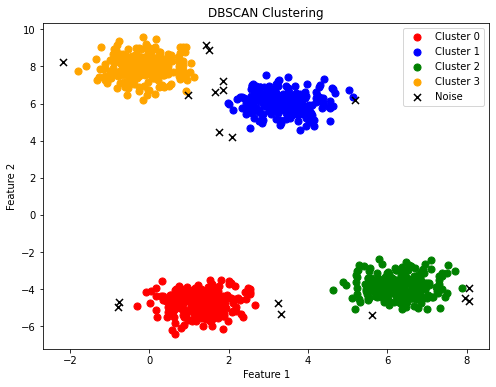

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.6)
# 'centers' defines how many clusters there are.
# 'cluster_std' controls the spread of the clusters, here 0.6 for moderate variance.

# DBSCAN parameters:
dbscan = DBSCAN(eps=0.5, min_samples=5)
# eps (epsilon): This parameter defines the maximum distance between two samples to be considered as in the same neighborhood.
# min_samples: This is the minimum number of samples required to form a dense region (i.e., a cluster).

# Apply DBSCAN
labels = dbscan.fit_predict(X)

# Define colors for clusters and noise
cluster_colors = ['red', 'blue', 'green', 'orange']
noise_color = 'black'

# Plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Noise points
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=noise_color, s=50, label='Noise', marker='x')
    else:
        # Cluster points
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=cluster_colors[label % len(cluster_colors)], s=50, label=f'Cluster {label}')

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 3- Evaluation
## With Real-world data

### Adjusted Rand Index (ARI)
ARI measures the similarity between two clusterings, adjusted for chance. It ranges from -1 to 1, where 1 means perfect agreement, 0 indicates random clustering, and negative values show worse-than-random performance.

### Normalized Mutual Information (NMI)
NMI quantifies shared information between two clusterings, normalized to account for the number of clusters. It ranges from 0 (no information) to 1 (perfect match).

### Homogeneity, Completeness, and V-Measure
Homogeneity checks if clusters contain only data from a single true class. Completeness ensures all data from a class are in the same cluster. V-Measure balances both, combining homogeneity and completeness into a single score.

Homogeneity: 0.739
Completeness: 0.739
V-Measure: 0.739
Adjusted Rand Index (ARI): 0.713
Normalized Mutual Information (NMI): 0.739


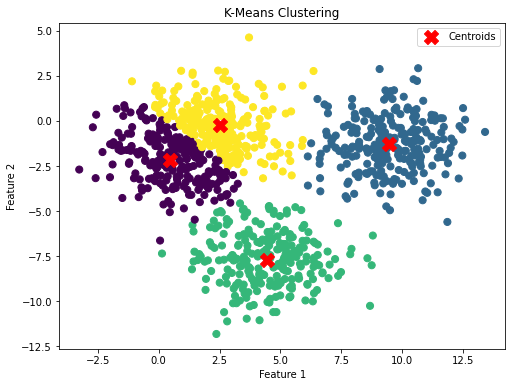

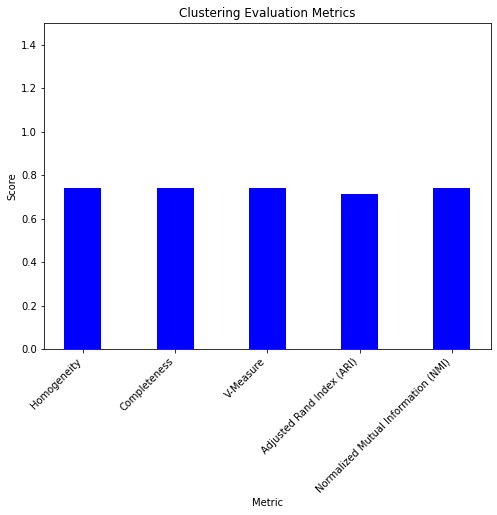

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, normalized_mutual_info_score

# Generate synthetic data with noise
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1.5)  # Increased cluster_std for more spread

# Apply K-Means
kmeans = KMeans(n_clusters=4, n_init=10)

# Fit the K-Means model to the data and predict the labels for each point
labels = kmeans.fit_predict(X)

# Compute Homogeneity, Completeness, V-Measure, ARI, and NMI
homogeneity = homogeneity_score(y, labels)
completeness = completeness_score(y, labels)
v_measure = v_measure_score(y, labels)
ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)

# Create a dictionary of the evaluation metrics
metrics = {
    "Homogeneity": homogeneity,
    "Completeness": completeness,
    "V-Measure": v_measure,
    "Adjusted Rand Index (ARI)": ari,
    "Normalized Mutual Information (NMI)": nmi
}

# Print the evaluation metrics
print(f"Homogeneity: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"V-Measure: {v_measure:.3f}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

# Plot the K-Means clustering result (with centroids)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot the evaluation metrics as a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color='blue', width=0.4)  # Decreased the bar width
plt.title("Clustering Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 1.5)  # Set the y-axis limit to 2

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees for better readability

# Show the plot
plt.show()


## Without Real-world data

### Silhouette Score
The Silhouette Score evaluates how well each point fits within its cluster compared to other clusters. A score close to +1 indicates good clustering, 0 means points are near boundaries, and negative values suggest misclassifications.

### Davies-Bouldin Index
The Davies-Bouldin Index measures the average similarity between clusters, considering compactness and separation. Lower values indicate better clustering, with well-separated and compact clusters.

### Calinski-Harabasz Index
The Calinski-Harabasz Index compares between-cluster dispersion to within-cluster dispersion. Higher values suggest better clustering with distinct, well-separated clusters and tight internal groupings.


Silhouette Score: 0.682
Davies-Bouldin Index: 0.442
Calinski-Harabasz Index: 3847.729


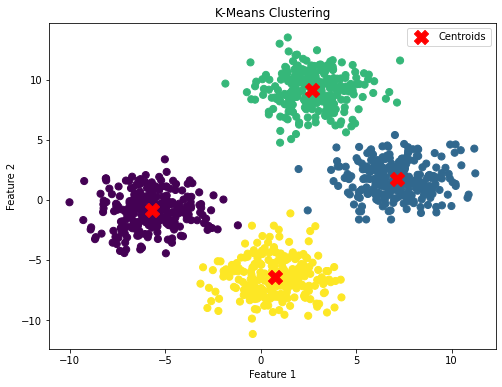

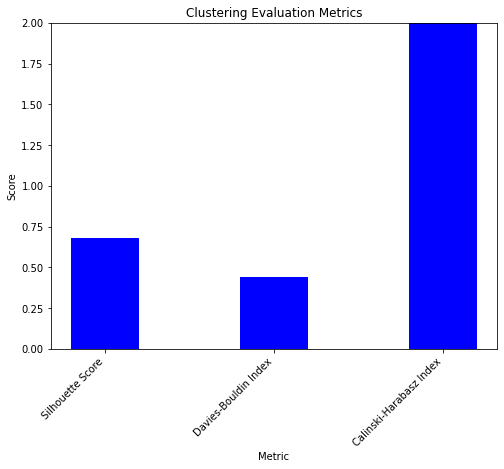

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate synthetic data with noise
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1.5)  # Increased cluster_std for more spread

# Apply K-Means
kmeans = KMeans(n_clusters=4, n_init=10)

# Fit the K-Means model to the data and predict the labels for each point
labels = kmeans.fit_predict(X)

# Compute Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index
sil_score = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

# Create a dictionary of the evaluation metrics
metrics = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi,
    "Calinski-Harabasz Index": ch_index
}

# Print the evaluation metrics
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")

# Plot the K-Means clustering result (with centroids)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot the evaluation metrics as a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color='blue', width=0.4)  # Decreased the bar width
plt.title("Clustering Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 2)  # Set the y-axis limit to 2

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees for better readability

# Show the plot
plt.show()
